Changeable parameters:
 
starting_month = The starting month to pull data <br>
count = Represents the amount of months pulled <br>
ticker = Stock ticker that can be changed to get information about other companies

All can be found in the first cell after the imports.

In [230]:
import pandas as pd
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')

import numpy as np

from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import MWETokenizer
from nltk.tokenize import WordPunctTokenizer

import re

from dateutil.relativedelta import *
from dateutil.rrule import *

import twint
import nest_asyncio
nest_asyncio.apply()

import yfinance as yf

from datetime import datetime

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KleinMD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KleinMD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [231]:
ticker = ['AAPL']
stock_returns = []
#YYYY-MM-DD
starting_month= '2010-01-01'
format = '%Y-%m-%d'
start_stock_format = datetime.strptime(starting_month, format)
count = 10

for x in range(0,count):
    use_date = start_stock_format + relativedelta(months =+x)
    s_since = use_date.strftime(format)
    s_until = (use_date +relativedelta(months =+1)).strftime(format)
    stock = pd.DataFrame(yf.download(ticker,s_since,s_until))
    stock['Date'] = s_since[:7]
    stock['Daily Returns'] = ((stock['Adj Close'] / stock['Adj Close'].shift(1)) - 1)*100
    stock.head()
    stock_returns.append(stock)    
    print(x)

[*********************100%***********************]  1 of 1 completed
0
[*********************100%***********************]  1 of 1 completed
1
[*********************100%***********************]  1 of 1 completed
2
[*********************100%***********************]  1 of 1 completed
3
[*********************100%***********************]  1 of 1 completed
4
[*********************100%***********************]  1 of 1 completed
5
[*********************100%***********************]  1 of 1 completed
6
[*********************100%***********************]  1 of 1 completed
7
[*********************100%***********************]  1 of 1 completed
8
[*********************100%***********************]  1 of 1 completed
9


In [232]:
stock.tail()

,Open,High,Low,Close,Adj Close,Volume,Date,Daily Returns
Date,,,,,,,,
2010-10-25,11.038929,11.128572,11.015715,11.030000,9.515040,392462000,2010-10,0.445576
2010-10-26,10.959642,11.062143,10.916072,11.001785,9.490700,392929600,2010-10,-0.255812
2010-10-27,10.987500,11.067857,10.914286,10.993929,9.483923,399002800,2010-10,-0.071405
2010-10-28,10.998215,11.000000,10.746428,10.901428,9.404126,551051200,2010-10,-0.841390
2010-10-29,10.865357,10.924286,10.745358,10.749286,9.272884,430511200,2010-10,-1.395577


In [233]:
xy_df = pd.DataFrame(columns = ['Date','Monthly Return','Subjectivity'])
for x in range(0, len(stock_returns)):
    new_row = { 'Date': stock_returns[x]['Date'][0][:7],
               'Monthly Return':np.nansum(stock_returns[x]['Daily Returns'],axis=0) }
    xy_df = xy_df.append(new_row, ignore_index=True)



In [234]:
xy_df

,Date,Monthly Return,Subjectivity
0,2010-01,-8.759112,NaN
1,2010-02,5.139454,NaN
2,2010-03,11.899953,NaN
3,2010-04,10.904410,NaN
4,2010-05,-0.830587,NaN
5,2010-06,-3.244218,NaN
6,2010-07,2.473558,NaN
7,2010-08,-7.264759,NaN
8,2010-09,15.681006,NaN
9,2010-10,6.138958,NaN


In [235]:
def clean_tweets(tweet):
    user_removed = re.sub(r'@[A-Za-z0-9]+','',tweet)
    link_removed = re.sub('https?://[A-Za-z0-9./]+','',user_removed)
    only_alphanumeric = re.sub('[^a-zA-Z0-9]', ' ', user_removed)
    lower_case_tweet = only_alphanumeric.lower()
    tok = WordPunctTokenizer()
    words = tok.tokenize(lower_case_tweet)
    clean_tweet = (' '.join(words)).strip()
    return clean_tweet 

def twint_to_pandas(columns):
    return twint.output.panda.Tweets_df[columns]

def getSubjectivity(clean_tweets):
  return TextBlob(clean_tweets).sentiment.subjectivity

def getPolarity(clean_tweets):
  return TextBlob(clean_tweets).sentiment.polarity



In [236]:
months_list = []
#use_date = '2010-01-01 00:00:00'
start = starting_month +' '+ '00:00:00' #changing the format to '%Y-%m-%d %H:%M:%S'
use_date = starting_month +' '+ '00:00:00'
format = '%Y-%m-%d %H:%M:%S'
start_format = datetime.strptime(start, format)




for x in range (0,count):
    use_date = start_format + relativedelta(months =+x)
    t = twint.Config()
    t.Search = '#AAPL'
    t.Since = use_date.strftime(format)
    t.Until = (use_date +relativedelta(months =+1)).strftime(format)
    t.Store_object = True
    t.Lang = 'en'
    t.Limit = 10
    t.Pandas =True
    twint.run.Search(t)
    df = twint_to_pandas(["date", "username", "tweet"])
    months_list.append(df)

    

8467667935 2010-01-31 22:59:41 +0100 <StockAAPL> @LuckyRobJ I'm thinking of hiding sensors to track #Apple Store visitors and automating my #AAPL stock purchases accordingly.: @LuckyR...
8467632930 2010-01-31 22:58:35 +0100 <abashford> @LuckyRobJ I'm thinking of hiding sensors to track #Apple Store visitors and automating my #AAPL stock purchases accordingly.
8462693476 2010-01-31 20:24:36 +0100 <StockAAPL> Just setup my #Scottrade account; kick-starting February with my first trade #AAPL: Just setup my #Scottrade account; kick-starting Fe...
8461379159 2010-01-31 19:42:59 +0100 <954life> Looking forward to the #goog #aapl grudge match, but hope #gmail and goog apps remain integrated on aapl products  http://tr.im/MhYp
8456854000 2010-01-31 17:18:01 +0100 <StockAAPL> Actually, I'm surprised... I thought #iTunes was a larger source of revenue than it actually is.  http://bit.ly/aDYX3U #apple #aapl: Ac...
8456105415 2010-01-31 16:53:48 +0100 <LuckyRobJ> Actually, I'm surprised... I thoug

9779176995 2010-02-28 16:02:39 +0100 <brokerz_nasdaq> RT @actionjaxon666 - Riding high. #AAPL $AAPL  http://brokerz.com/_w2H/
9777295027 2010-02-28 15:05:26 +0100 <themaxpain> $AAPL ($204.62), current max pain strike price: $200.00.  Put/Call ratio: 0.802. #AAPL Get more at  http://bit.ly/9xXGzk
9761680170 2010-02-28 05:20:53 +0100 <HottTrends> Hot Stock Trends  http://hotstocktrends.blogspot.com/?spref=tw #aapl #stock #iphone
9760133189 2010-02-28 04:40:34 +0100 <spreadking> Hot Stock Trends  http://hotstocktrends.blogspot.com/?spref=tw #aapl #stock #iphone
9722476533 2010-02-27 10:15:23 +0100 <iMorpheus> 18:12 JST [#Starbucks #SitRep #AAPL: Stuck using pen & paper. I need an iPad.] EOT
9678894223 2010-02-26 15:05:26 +0100 <themaxpain> $AAPL ($202.00), current max pain strike price: $200.00.  Put/Call ratio: 0.771. #AAPL Get more at  http://bit.ly/9xXGzk
9670217477 2010-02-26 09:53:58 +0100 <RT_steve_jobs> RT @Sophist_   http://bit.ly/41sRgx #AAPL
9669608605 2010-02-26 09:28:43 +0100 

11390794533 2010-04-01 00:40:38 +0100 <atlantechatlbiz> Jesus drives a silver Mercedes, curses a lot and shops at Whole Foods  http://tinyurl.com/yham5ks #AAPL
11390761705 2010-04-01 00:39:54 +0100 <ForexDudes> Stock Market... #aapl #avt #belm #cb #contributor #economy #externalresearch #japan #ldk #mcd #nflx #rimm #stocks #t #ubs #usa #vale #vz
11390683529 2010-04-01 00:38:04 +0100 <Urvaksh> Jesus drives a silver Mercedes, curses a lot and shops at Whole Foods  http://tinyurl.com/yham5ks #AAPL
11377354852 2010-03-31 19:22:32 +0100 <jamiebardin> #AAPL 13" MacBook Pro + 8 GB RAM + SSD + 24" Cinema Display + bluetooth keyboard + Magic Mouse + laptop stand by Rain = pure happiness.
11372776041 2010-03-31 17:45:13 +0100 <DrErnie> "Apple (#AAPL) now has a market cap of around $215 billion... it couldn't have happened to a more deserving company"  http://bit.ly/aC77sr
11367881262 2010-03-31 16:05:25 +0100 <themaxpain> $AAPL ($235.52), 3/31/2010, current max pain strike price: $210.00.  Put/C

13155859671 2010-05-01 01:15:11 +0100 <HalloweenTime3> Terrible way to end the week with the DOW down over 150 points.... #aapl down on the day of the 3G Ipad Launch.
13145253618 2010-04-30 21:02:20 +0100 <bajirooin> Brendan's Live Day Trading from...  http://bit.ly/baY95l #2009 #aapl #amzn #april #brendan's #from #live #rimm #shorting #stocks #trading
13144533218 2010-04-30 20:45:58 +0100 <fortune8> Yesterday's mistake was shorting #AAPL = win today. Today's mistake was buying #GS. Results not known yet.
13144461308 2010-04-30 20:44:19 +0100 <fortune8> Covered half #AAPL short from yesterday at 262.05
13142907831 2010-04-30 20:09:06 +0100 <scottcgreer> RT @TechCrunch Microsoft Agrees With Apple And Google: "The Future Of The Web Is HTML5" -  http://tcrn.ch/bw9WUG #MSFT #AAPL #GOOG
13140096304 2010-04-30 19:09:36 +0100 <dmackdaddy> #aapl:  Unboxing/Using iPad 3G  http://bit.ly/cigfex
13136694821 2010-04-30 18:02:36 +0100 <Dr_Si_C> Is it time to buy more #AAPL shares?   http://j.mp/cTPk

15134430896 2010-05-31 23:58:27 +0100 <Ezeani> The urge to just go and purchase the #AAPL  iPad keeps growing by the minute... I'm starting to get the shakes. 06/07 cant come soon enough!
15131914682 2010-05-31 23:03:56 +0100 <hunterbradford> yet another reason I should have bought #AAPL....iPad sales beat the Street by&nbsp;162%  http://shar.es/md9hY
15125629960 2010-05-31 20:47:58 +0100 <PerlaCardenas> Apple is selling iPads at the blistering rate of one every 2.5 sec =&gt; 2 million iPads in 59 days, or nearly 24 iPads per minute. #AAPL #iPad
15125282876 2010-05-31 20:40:39 +0100 <joelpinto> #AAPL surpassed #MSFT is old news.... What's more interesting is #AAPL is ten times bigger than #DELL now... Good Times...
15117795214 2010-05-31 18:22:34 +0100 <MartinGson> @BennySkogberg Nope, tidigast Augusti om man inte jobbar några importer. Tänkte mer på stocks. #AAPL
15110638346 2010-05-31 16:25:36 +0100 <semantium> Apple sells two million iPads  http://bit.ly/b5g2Ct #ipad #AAPL
151094355

17443433713 2010-06-30 23:41:14 +0100 <nlitvinoff> Sobre como EEUU hipotecó su futuro.  http://bit.ly/cKO9rv #SPY #AAPL #EURUSD
17441627474 2010-06-30 23:06:58 +0100 <stevemwebb> Iphone to Verizon...nah, ain't nuthin but a pipe dream.  http://bit.ly/9bKfSh #AAPL #VZN #iphone
17436066940 2010-06-30 21:20:28 +0100 <keith_douglas> Unfortunately, in addition to #TIP &  #VXX, also holding too much #AAPL . Still betting on cash flow in AAPL to save the day.
17434919534 2010-06-30 20:58:57 +0100 <atlantechatlbiz> Oh, how I wish I had gone to antenna engineering school, instead of journalism school:  http://j.mp/aIzqbs #AAPL
17434068643 2010-06-30 20:42:47 +0100 <Urvaksh> Oh, how I wish I had gone to antenna engineering school, instead of journalism school:  http://j.mp/aIzqbs #AAPL
17427953322 2010-06-30 18:58:13 +0100 <seetu> ZOMG #AAPL hiring antenna engrs ROTFLMAO  http://bit.ly/bXvVVP  http://bit.ly/dopACY  http://bit.ly/aWskcT /. link:  http://bit.ly/cMFZQ7
17420707196 2010-06-30 17:09:2

19997447413 2010-07-31 17:06:38 +0100 <moteltan> Just replicated #antennagate on friend's EVO and a palm pre. I think I'll believe Jobs on this one. #Witchhunt #aapl mine works fine.
19989474560 2010-07-31 14:54:43 +0100 <ysrthgrathe> #AAPL to innovate again: next big thing in telecommunications: it's #iNet. Packet switching inter-network network.
19984582781 2010-07-31 13:07:13 +0100 <the_world_news>  http://euraeka.com/articles/7017845-Cramer-s-Mad-Money-What-the-Tech-7-26-10- #chipotle #aapl #skyworks #cirrus #cramer
19964031430 2010-07-31 05:48:22 +0100 <kegill> Own #MSFT stock? Read this from Fortune about "train wreck that is Steve #Ballmer":  http://bit.ly/bzmwdI #aapl
19930972706 2010-07-30 20:42:02 +0100 <mapdentist> @TechZader apple inc ipad -after the ipod & iphone - #aapl stock & earnings gone up in market cap over 70 billion dollars www.mapdentist.com
19925763101 2010-07-30 19:20:24 +0100 <ContrarianBrett> US Consumer Spending Goes Haywire – The “New…  http://goo.gl/fb/mv5

22660097924 2010-09-01 01:52:13 +0100 <MDFavero> Oh anticipation! RT @Urvaksh: T-24 hours. #AAPL
22657208286 2010-09-01 01:11:24 +0100 <Urvaksh> I'd kill to have the job of the guy who creates Steve Jobs' Keynote presentations. #Sept1 #AAPL
22653221132 2010-09-01 00:12:19 +0100 <Packard_Sonic> Six great #Apple failures  http://goo.gl/fb/j2BZ5 #appleinc #aapl #VoteMcNealy
22646664302 2010-08-31 22:31:13 +0100 <mapdentist> Amazon #amzn , APPLE #AAPL inc  & Ebay  tech stocks up - #GOOG / google down www.mapdentist.com
22633381487 2010-08-31 19:01:36 +0100 <Urvaksh> T-24 hours. #AAPL
22623699458 2010-08-31 17:03:00 +0100 <aclr8> #intc buys its way into core of #aapl #wireless supply chain for #iphone and perhaps #ipad  http://bit.ly/dpcOmI #infineon #strategy #deal
22620550098 2010-08-31 16:26:16 +0100 <Solidsnakechase> RT @9to5mac: Six great #Apple failures  http://goo.gl/fb/j2BZ5 #appleinc #aapl
22619710248 2010-08-31 16:16:11 +0100 <maddavidbrown> RT @9to5mac: Six great #Apple failures 

26020489829 2010-10-01 00:27:08 +0100 <MichaelComeau> Consumer interest in #Android Catches Up to #iPhone. Time to dump #AAPL? $GOOG $MOT  http://bit.ly/bfMlzy
26007690609 2010-09-30 21:21:08 +0100 <lhridley> As always, I continue to be impressed with Apple...this #MacMini server is da Bomb!  Simple to set up too!  #aapl #win #again
26002128999 2010-09-30 20:00:46 +0100 <brian_esl> The #iPad can run big boy apps now thanks to #StarNet  #AAPL  http://bit.ly/b0601e
25995308834 2010-09-30 18:31:27 +0100 <kgross125> september's high flyers are for sale today #AAPL #AKAM and #VMW
25990594834 2010-09-30 17:37:19 +0100 <CBOE_TV> Doctor J reports on: #AAPL, #AIG, #BA & #MKC. $$  http://bit.ly/cuJFai
25986659006 2010-09-30 16:54:46 +0100 <bargainplaceuk> IPHONE NEWS: EA, Yahoo highlight tech action - MarketWatch  http://is.gd/fCjJB #AAPL #EA #NASDAQ
25966460718 2010-09-30 12:17:25 +0100 <nicoroberti> #aapl Thanks to the tim cook rumor, my stoploss took action and i sold all the stocks i had lef

29303113177 2010-10-31 20:16:16 +0100 <nlitvinoff> Rendimiento S&P 500, 5ta semana de Octubre 2010.  http://bit.ly/cB9Kh4 #SPY #AAPL #EURUSD
29302790597 2010-10-31 20:11:22 +0100 <VisualB2B> RT @ceoworld: Why Apple sued Motorola over iPhone patents?  http://goo.gl/fb/xcmaH #business #aapl #appleinc #backflip #charm #cliq
29302657882 2010-10-31 20:09:21 +0100 <edwinbeall> RT@ceoworld: Why Apple sued Motorola over iPhone patents?  http://goo.gl/fb/xcmaH #business #aapl #appleinc #backflip #charm #cliq
29301736395 2010-10-31 19:55:34 +0100 <ceoworld> Why Apple sued Motorola over iPhone patents?  http://goo.gl/fb/xcmaH #business #aapl #appleinc #backflip #charm #cliq
29213698863 2010-10-30 22:05:43 +0100 <Urvaksh> Suggestions for a good RSS client for Mac. Something similar to Reeder for iOS, perhaps? Thanks #AAPL
29196802134 2010-10-30 18:09:31 +0100 <Urvaksh> Is there a way to make a web site into an icon that can be  opened from the dock in OS X?  Like u can with iOS.  Thanks.  #AAPL #M

In [237]:
x_df = pd.DataFrame(columns =['tweet'])


for x in range(0, len(months_list)):
    x_df['tweet'] = months_list[x]['tweet']
    x_df['tweet'] = x_df['tweet'].apply(clean_tweets)
    x_df['tweet'] = x_df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    months_list[x]['tweet'] = x_df['tweet']


C:\Util\Anaconda3\envs\Machine Learning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [238]:
for x in range(0, len(months_list)):
    months_list[x]['Subjectivity'] = months_list[x]['tweet'].apply(getSubjectivity)
    months_list[x]['Polarity'] = months_list[x]['tweet'].apply(getPolarity)


C:\Util\Anaconda3\envs\Machine Learning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Util\Anaconda3\envs\Machine Learning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [239]:
months_list

[                   date    username  \
 0   2010-01-31 22:59:41   StockAAPL   
 1   2010-01-31 22:58:35   abashford   
 2   2010-01-31 20:24:36   StockAAPL   
 3   2010-01-31 19:42:59     954life   
 4   2010-01-31 17:18:01   StockAAPL   
 ..                  ...         ...   
 95  2010-01-28 19:21:03   ryan_bond   
 96  2010-01-28 19:18:53  dmackdaddy   
 97  2010-01-28 19:15:20     Urvaksh   
 98  2010-01-28 18:49:35   jlankinen   
 99  2010-01-28 18:15:23  sfreynolds   
 
                                                 tweet  Subjectivity  Polarity  
 0   thinking hiding sensors track apple store visi...      0.000000  0.000000  
 1   thinking hiding sensors track apple store visi...      0.000000  0.000000  
 2   setup scottrade account kick starting february...      0.177778  0.083333  
 3   looking forward goog aapl grudge match hope gm...      0.000000  0.000000  
 4   actually surprised thought itunes larger sourc...      0.500000  0.033333  
 ..                             

In [240]:
for x in range(0, len(months_list)):
    xy_df['Subjectivity'][x] = months_list[x]['Subjectivity'].mean()


C:\Util\Anaconda3\envs\Machine Learning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [241]:
xy_df

,Date,Monthly Return,Subjectivity
0,2010-01,-8.759112,0.362118
1,2010-02,5.139454,0.276849
2,2010-03,11.899953,0.335717
3,2010-04,10.904410,0.325736
4,2010-05,-0.830587,0.174295
5,2010-06,-3.244218,0.344314
6,2010-07,2.473558,0.319221
7,2010-08,-7.264759,0.223415
8,2010-09,15.681006,0.286845
9,2010-10,6.138958,0.210195


<AxesSubplot:xlabel='Date'>

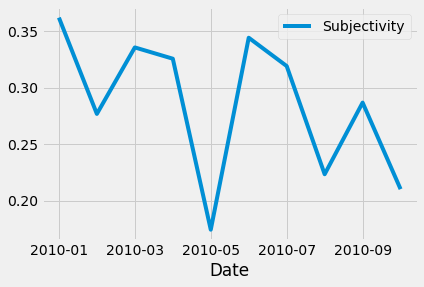

In [242]:
xy_df.plot(x ='Date', y='Subjectivity', kind = 'line')

<AxesSubplot:xlabel='Date'>

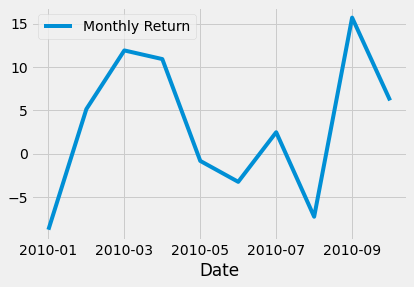

In [243]:
xy_df.plot(x = 'Date', y ='Monthly Return', kind= 'line')

In [244]:
import numpy as np
x1 = np.array([xy_df['Monthly Return']])
x2 = np.array([xy_df['Subjectivity']])
r = np.corrcoef(x1, x2)
print('Correlation between Monthly Returns and Subjectivity:')
r[0,1]


Correlation between Monthly Returns and Subjectivity:


0.06407743600071314